In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
import os
from textblob import TextBlob
import time
%matplotlib inline
current_directory = os.getcwd()
print(current_directory)
os.chdir(current_directory)

C:\Users\veera


In [2]:
food_data = pd.read_csv(r'C:\Users\veera\Desktop\data\fourth_food_data2.csv')
food_data.shape

(143576, 15)

In [3]:
food_data

,Unnamed: 0,level_0,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,food_platform
0,0,1,1,LionelJackson8,2021-11-02 23:57:05+00:00,"Maryland, USA",RT @DeathBattleBot: DEATH BATTLE! Super Robotn...,death battle super robotnik grubhub dad,@deathbattlebot,NaN,True,0.333333,0.666667,Positive,grubhub
1,1,2,2,real_dead1,2021-11-02 23:54:28+00:00,"Ontario, CA",RT @jacksfilms: we are nearing the 1 year anni...,nearing year anniversary grubhub dance talked,@jacksfilms,NaN,True,0.000000,0.000000,Neutral,grubhub
2,2,3,3,sweatt_rachel,2021-11-02 23:53:32+00:00,NaN,@Grubhub Ordered dinner delivery via GrubHub t...,ordered dinner delivery via grubhub tonight gi...,@grubhub,NaN,False,-0.800000,1.000000,Negative,grubhub
3,3,4,4,Mxrrisxn_,2021-11-02 23:53:30+00:00,âœ§ à½»à½´ÛªÛªâ¸™ÍŽ,RT @DeathBattleBot: DEATH BATTLE! Super Robotn...,death battle super robotnik grubhub dad,@deathbattlebot,NaN,True,0.333333,0.666667,Positive,grubhub
4,4,5,5,YT_BatFang25,2021-11-02 23:52:56+00:00,in my room sleeping,RT @DeathBattleBot: DEATH BATTLE! Super Robotn...,death battle super robotnik grubhub dad,@deathbattlebot,NaN,True,0.333333,0.666667,Positive,grubhub
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143571,143571,205923,205923,Big_BlueNYC,2021-11-03 18:12:07+00:00,New York City,@DoorDash is down. @UberEats it is. Any promos?,any promos,"@doordash, @ubereats",NaN,False,0.000000,0.000000,Neutral,NaN
143572,143572,205924,205924,JamesVanCleaf,2021-11-03 18:12:04+00:00,NY ðŸš—DE ðŸš—Las Vegas ðŸš— DE ðŸš— â“,@zackisnuclear @DoorDash And itâ€™s not like y...,and itâ like sit stare map see order go beforâ,"@zackisnuclear, @doordash",NaN,False,0.000000,0.000000,Neutral,NaN
143573,143573,205925,205925,Ridershare2000,2021-11-03 18:11:41+00:00,"Miami, FL","@CRideshare @DoorDash Lmao I hear that, my fav...",lmao hear favorite orderâ oneâ base pay tip mile,"@crideshare, @doordash",NaN,False,0.100000,1.000000,Positive,NaN
143574,143574,205926,205926,servicesdown_,2021-11-03 18:11:35+00:00,NaN,ðŸ”” #DoorDash down?\n\nðŸ”— Real-time status:...,status retweet affected,NaN,"#doordash, #doordashdownâ",True,0.000000,0.000000,Neutral,NaN


In [4]:
contractions = {
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"‘cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he would",
"he’d’ve": "he would have",
"he’ll": "he shall / he will",
"he’ll’ve": " he will have",
"he’s": " he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": " how is",
"i’d": " I would",
"i’d’ve": "I would have",
"i’ll": " I will",
"i’ll’ve": " I will have",
"i’m": "I am",
"i’ve": "I have",
"isn’t": "is not",
"it’d": " it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’ve": "you have",
"rn": "right now"
}


In [5]:
def remove_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

In [6]:
food_data['text'] = food_data['text'].apply(lambda x : remove_contractions(x))
food_data['text'].head()

0    RT @DeathBattleBot: DEATH BATTLE! Super Robotn...
1    RT @jacksfilms: we are nearing the 1 year anni...
2    @Grubhub Ordered dinner delivery via GrubHub t...
3    RT @DeathBattleBot: DEATH BATTLE! Super Robotn...
4    RT @DeathBattleBot: DEATH BATTLE! Super Robotn...
Name: text, dtype: object

In [7]:
food_data.to_csv(r'C:\Users\veera\Desktop\data\fifth_after_contractions.csv')

In [8]:
import re
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

tokenized_tweets = [tweet_tokenizer.tokenize(tweet) for tweet in food_data.text]
classifier_text = []
for tweet in tokenized_tweets:
    links = [w for w in tweet if re.search('^https:\w+', w)]
    words_in_tweet = [w.lower() for w in tweet if w.isalpha() or w.lower() in ('@grubhub', '@ubereats', '@doordash') and w not in links]
    classifier_text.append(' '.join(words_in_tweet))

print(len(classifier_text))
food_data['classifier_text'] = pd.Series(classifier_text)

143576


In [9]:
food_data.to_csv(r'C:\Users\veera\Desktop\data\sixth_classifier.csv')

In [10]:
food_data.tail()

,Unnamed: 0,level_0,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,food_platform,classifier_text
143571,143571,205923,205923,Big_BlueNYC,2021-11-03 18:12:07+00:00,New York City,@DoorDash is down. @UberEats it is. Any promos?,any promos,"@doordash, @ubereats",NaN,False,0.0,0.0,Neutral,NaN,@doordash is down @ubereats it is any promos
143572,143572,205924,205924,JamesVanCleaf,2021-11-03 18:12:04+00:00,NY ðŸš—DE ðŸš—Las Vegas ðŸš— DE ðŸš— â“,@zackisnuclear @DoorDash And itâ€™s not like y...,and itâ like sit stare map see order go beforâ,"@zackisnuclear, @doordash",NaN,False,0.0,0.0,Neutral,NaN,@doordash and itâ s not like you can sit there...
143573,143573,205925,205925,Ridershare2000,2021-11-03 18:11:41+00:00,"Miami, FL","@CRideshare @DoorDash Lmao I hear that, my fav...",lmao hear favorite orderâ oneâ base pay tip mile,"@crideshare, @doordash",NaN,False,0.1,1.0,Positive,NaN,@doordash lmao i hear that my favorite orderâ ...
143574,143574,205926,205926,servicesdown_,2021-11-03 18:11:35+00:00,NaN,ðŸ”” #DoorDash down?\n\nðŸ”— Real-time status:...,status retweet affected,NaN,"#doordash, #doordashdownâ",True,0.0,0.0,Neutral,NaN,ðÿ down ðÿ status ðÿ retweet if you are affect...
143575,143575,205927,205927,NorCalFF15,2021-11-03 18:11:24+00:00,"SF, Oakland, and beyond",RT @GigWorkersRise: Doordash office workers ha...,doordash office worker walking seeing protest ...,@gigworkersrise,NaN,True,0.0,0.0,Neutral,NaN,rt doordash office workers have been walking b...


In [11]:
tweet_list = food_data['classifier_text'].tolist()
#tweet_list = [tweet for tweet in tweet_list if str(tweet) != 'nan']

In [12]:
tweet_list

['rt death battle super robotnik vs grubhub dad',
 'rt we are nearing the year anniversary of the grubhub dance why is this not being talked about',
 '@grubhub ordered dinner delivery via grubhub tonight given we have a nasty cold instead of delivering the food thâ',
 'rt death battle super robotnik vs grubhub dad',
 'rt death battle super robotnik vs grubhub dad',
 'rt death battle super robotnik vs grubhub dad',
 'rt death battle super robotnik vs grubhub dad',
 'rt death battle super robotnik vs grubhub dad',
 'rt death battle super robotnik vs grubhub dad',
 'death battle super robotnik vs grubhub dad',
 'you cry over spilt milk but you should cry when your grubhub order is over an hour late for pickup notâ',
 'the fuck grubhub',
 'they still responded to my dm they told me to send or the message from a week ago',
 '@grubhub after hours i still order no dinner no response i will contact my credit card abâ',
 'mine is on the way via grubhub results are pending as well',
 'ðÿ ðÿ i be

In [13]:
food_data = food_data.drop(['level_0'], axis=1)
food_data.tail()
    

,Unnamed: 0,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,food_platform,classifier_text
143571,143571,205923,Big_BlueNYC,2021-11-03 18:12:07+00:00,New York City,@DoorDash is down. @UberEats it is. Any promos?,any promos,"@doordash, @ubereats",NaN,False,0.0,0.0,Neutral,NaN,@doordash is down @ubereats it is any promos
143572,143572,205924,JamesVanCleaf,2021-11-03 18:12:04+00:00,NY ðŸš—DE ðŸš—Las Vegas ðŸš— DE ðŸš— â“,@zackisnuclear @DoorDash And itâ€™s not like y...,and itâ like sit stare map see order go beforâ,"@zackisnuclear, @doordash",NaN,False,0.0,0.0,Neutral,NaN,@doordash and itâ s not like you can sit there...
143573,143573,205925,Ridershare2000,2021-11-03 18:11:41+00:00,"Miami, FL","@CRideshare @DoorDash Lmao I hear that, my fav...",lmao hear favorite orderâ oneâ base pay tip mile,"@crideshare, @doordash",NaN,False,0.1,1.0,Positive,NaN,@doordash lmao i hear that my favorite orderâ ...
143574,143574,205926,servicesdown_,2021-11-03 18:11:35+00:00,NaN,ðŸ”” #DoorDash down?\n\nðŸ”— Real-time status:...,status retweet affected,NaN,"#doordash, #doordashdownâ",True,0.0,0.0,Neutral,NaN,ðÿ down ðÿ status ðÿ retweet if you are affect...
143575,143575,205927,NorCalFF15,2021-11-03 18:11:24+00:00,"SF, Oakland, and beyond",RT @GigWorkersRise: Doordash office workers ha...,doordash office worker walking seeing protest ...,@gigworkersrise,NaN,True,0.0,0.0,Neutral,NaN,rt doordash office workers have been walking b...


In [14]:
food_data.shape

(143576, 15)

In [15]:
food_data.dropna()

,Unnamed: 0,index,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,food_platform,classifier_text
63,63,86,pallavkaushish,2021-11-02 19:29:58+00:00,"New Delhi, India","Find out what strategies @AWeber, @Gap and @Gr...",find strategy use successfully reactivate subs...,"@aweber, @gap, @grubhub",#email,True,0.750000,0.95,Positive,grubhub,find out what strategies and @grubhub use to s...
152,152,229,im_topicgurin,2021-11-02 13:51:37+00:00,"Chieti, Abruzzo",RT @Zedd: Iâ€™m LIVE now with Sound Bites deli...,live sound bite delivered tune,"@zedd, @grubhub","#ghsoundbites, #ad",True,0.268182,0.45,Positive,grubhub,rt iâ m live now with sound bites delivered by...
156,156,237,momsfocus,2021-11-02 13:28:15+00:00,"Texas, USA",RT @Grubhub: Happy #Halloween2021 ! To celebra...,happy celebrate weâ spooktacular day yet tweet...,@grubhub,"#halloween2021, #gâ",True,0.800000,1.00,Positive,grubhub,rt @grubhub happy to celebrate weâ re having o...
269,269,419,joshknifer,2021-11-01 23:59:38+00:00,"Denver, CO",Stranded at hotel by #LAX because @AmericanAir...,stranded hotel canceling every flight let orderâ,"@americanair, @grubhub",#lax,True,0.000000,0.00,Neutral,grubhub,stranded at hotel by because is canceling ever...
298,298,466,firasyafira703,2021-11-01 22:39:32+00:00,idol hell,@jacksfilms GrubHub perks â« give ðŸŽ you ðŸ...,grubhub perk give ðÿž deal food ÿðÿ ðÿž love t...,@jacksfilms,#yiayeat,False,0.550000,0.75,Positive,grubhub,grubhub perks â give ðÿž you ðÿ deals ðÿ on ðÿ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143407,143407,205733,CaliforniaLabor,2021-11-03 19:05:00+00:00,California,RT @wedriveprogress: Gig workers tried to deli...,gig worker tried deliver petition asking ceo k...,"@wedriveprogress, @t_xu",#doordash,True,0.000000,0.75,Neutral,doordash,rt gig workers tried to deliver our petition a...
143414,143414,205741,ZuhdiZulfakar,2021-11-03 19:04:24+00:00,"Kuala Kangsar, Perak, Malaysia",RT @SaraAsylum: Uhhhâ€¦ did someone hack the f...,uhhhâ someone hack food delivery company,@saraasylum,"#downdetector, #doordash, #grubhub, #ubereats",True,0.000000,0.00,Neutral,doordash,rt uhhhâ did someone hack the food delivery co...
143432,143432,205761,wedriveprogress,2021-11-03 18:56:05+00:00,Northern California,Gig workers tried to deliver our petition aski...,gig worker tried deliver petition asking ceo k...,@t_xu,#doordash,True,0.000000,0.75,Neutral,doordash,gig workers tried to deliver our petition aski...
143469,143469,205804,_Jecare,2021-11-03 18:44:21+00:00,"Canoga Park, Los Angeles",Why it feel like @DoorDash_Help @DoorDash keep...,why feel like keep moving bottom pile email sa...,"@doordash_help, @doordash",#restaurant,True,0.000000,0.00,Neutral,doordash,why it feel like @doordash keep moving my to t...


In [16]:
grouped_food_data = food_data.groupby('food_platform')
grouped_food_data.groups.keys()

dict_keys(['doordash', 'doordash, grubhub', 'grubhub', 'ubereats', 'ubereats, doordash', 'ubereats, doordash, grubhub', 'ubereats, grubhub'])

In [17]:
list_of_connected_groups = []
for group in grouped_food_data.groups.keys():
    if len(group.split(',')) > 1:
        list_of_connected_groups.append(group)

In [18]:
print(list_of_connected_groups)

['doordash, grubhub', 'ubereats, doordash', 'ubereats, doordash, grubhub', 'ubereats, grubhub']


In [19]:
target_food_data = food_data[food_data['food_platform'].isin(list_of_connected_groups)].reset_index()
target_food_data.columns

Index(['level_0', 'Unnamed: 0', 'index', 'screen_name', 'date_time',
       'location', 'text', 'cleaned_tweet_text', 'twitter_handles',
       'twitter_hashtags', 'is_retweet', 'polarity', 'subjectivity',
       'sentiment', 'food_platform', 'classifier_text'],
      dtype='object')

In [20]:
target_food_data = target_food_data.drop(['level_0', 'Unnamed: 0','index'], axis = 1)
target_food_data.tail()


,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,food_platform,classifier_text
9327,Dej_OVOXO,2021-11-03 19:04:40+00:00,NaN,Anybody do deliver for doordash or grub hub ?,anybody deliver doordash grub hub,NaN,NaN,True,0.00,0.000,Neutral,"ubereats, doordash, grubhub",anybody do deliver for doordash or grub hub
9328,NBAchungboiii,2021-11-03 18:59:06+00:00,NaN,@Akademiks @FreddieGibbs His doordash from McD...,his doordash mcdonaldâ must lateðÿ,"@akademiks, @freddiegibbs",NaN,False,0.00,0.000,Neutral,"ubereats, doordash",his doordash from mcdonaldâ s must be lateðÿ
9329,sarah95mel,2021-11-03 18:20:40+00:00,"Sacramento, CA",@CrumblCookies Thanks!! I didnâ€™t realize @Do...,thanks didnâ realize one deliver when called l...,"@crumblcookies, @doordash",NaN,False,0.20,0.200,Positive,"ubereats, doordash, grubhub",thanks i didnâ t realize @doordash was the one...
9330,NorCalFF15,2021-11-03 18:17:06+00:00,"SF, Oakland, and beyond",.@DoorDash CEO @t_xu made over $400 million in...,ceo made million alone beating bay area ceo pa...,"@doordash, @t_xu",NaN,False,0.00,0.000,Neutral,"ubereats, doordash",@doordash ceo made over million in alone beati...
9331,imslayton,2021-11-03 18:14:02+00:00,Lemon,RT @GigWorkersRise: Weâ€™re outside the Doorda...,weâ outside doordash san francisco itâ one yea...,@gigworkersrise,NaN,True,-0.05,0.075,Negative,"ubereats, doordash",rt weâ re outside the doordash hq in san franc...


In [21]:
food_data.to_csv(r'C:\Users\veera\Desktop\data\seventh_final.csv')

In [22]:
food_data.shape

(143576, 15)

In [23]:
sample_target = target_food_data.sample(n = 6000, random_state = 95)


In [24]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-1]

'rt weâ re outside the doordash hq in san francisco itâ s one year to the day since prop passed doordash spent toâ'

In [25]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-2]

'the doordash man walking up with my food chewing wtf you chewing on sir ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ ðÿ'

In [26]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-3]

'as a driver i prefer to be paid when actually active sitting in idle and waiting for orders isâ'

In [27]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-4]

'iâ d rather full time uber doordash etc before going back to a job that doesnâ t give shit about fuck'

In [28]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-5]

'my poor sister was hungry for some wings and this doordash driver stole her shit ðÿ'

In [29]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'cleaned_tweet_text'].values[-6]

'nahhh man focus mode shit made miss like bomb as order doordash tfffðÿ'

In [30]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-7]

'i literally have to fight the urge to order doordash every single day this is not a joke anymore itâ s my life'

In [31]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-8]

'hey so sorry that your order had wrong items dm us the and phone number yoâ'

In [32]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-9]

'fort myers florida ordered take out from doordash from there wednesday this week ordered a wedge salad small câ'

In [33]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-10]

'stupid question speaking in postmates terms here since i dashed in a while are doordash mcdonalds orderâ'

In [34]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-11]

'think i wanna get all that done today plus doordash a little ðÿ'

In [35]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-12]

'me places a regular order bc the wait time seemed reasonable doordash so you wanted that like an hour late rightâ'

In [36]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-13]

'done ordering through doordash and grubhub everytime i order missing something'

In [37]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-14]

'âš doordash inc is looking for a manager partnership marketing ðÿ location remote us ðÿ apply here'

In [38]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-15]

'youâ re disgusting @doordash'

In [39]:
target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-16]

'wasted on doordash lmfao just to not eat none of the shit i bought ðÿ ƒ'

In [40]:
target_food_data.loc[target_food_data['sentiment'] == 'Positive', 'classifier_text'].values[-1]

'thanks i didnâ t realize @doordash was the one to deliver when i called the location they werenâ tâ'

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.tokenize import sent_tokenize

In [42]:
train_tweet = target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-3]
train_tweet = ' '.join([w for w in train_tweet.split() if w not in ('@ubereats', '@doordash')])
train_tweet

'as a driver i prefer to be paid when actually active sitting in idle and waiting for orders isâ'

In [43]:
train_tweet = target_food_data.loc[target_food_data['sentiment'] == 'Negative', 'classifier_text'].values[-15]
train_tweet = ' '.join([w for w in train_tweet.split() if w not in ('@grubhub', '@doordash')])
train_tweet

'youâ re disgusting'

In [44]:
from sklearn.feature_extraction.text import CountVectorizer 

In [45]:
import nltk
nltk.download('averaged_perceptron_tagger')
cleaned_text = ' '.join([w for w in train_tweet.split() if w not in ('@ubereats', '@grubhub', '@doordash')])
blob = TextBlob(cleaned_text)
blob.tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\veera\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('youâ', 'NN'), ('re', 'NN'), ('disgusting', 'VBG')]

In [46]:
target_food_data.loc[target_food_data['sentiment'] == 'Positive', 'text'].values[-1]

'@CrumblCookies Thanks!! I didnâ€™t realize @DoorDash was the one to deliver. When I called the location they werenâ€™tâ€¦ https://t.co/pSQneByB9y'

In [47]:
list_of_tweets = target_food_data['classifier_text'].tolist()
for tweet in list_of_tweets:
    if 'from' in tweet and 'to' in tweet:
        print(tweet)

@grubhub @doordash both need to stop taking money from people until they can ensure they have a driver you takeâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking

In [48]:
vectorizer = CountVectorizer(ngram_range=(2, 3))
analyzer = vectorizer.build_analyzer()

for tweet in tweet_list:
    ngrams = analyzer(tweet)
    count = 0
    for i in ngrams:
        if 'from' in i.split() and 'to' in i.split():
            print(tweet)

huge time saver and it helps employ people i went from lyft to grubhub during the pandemic please try toâ
when you try to order from @grubhub and they cancel or lose your order three times in a row probably the univâ
i genuinely donâ t know why i continue to try to order from grubhub today was just pitiful never again
i tried to make an order on grubhub the other night and grubhub cancelled it so i tried to order from another placâ
treat yourself to delivery from tavola order now
rt ubereats kept giving my order lastnight errors eventually indecided to order from grubhub somehow they endedâ
ubereats kept giving my order lastnight errors eventually indecided to order from grubhub somehow theyâ
iâ m gonna pretend iâ m interested in business so i can get some grubhub credit from going to this panel
huge time saver and it helps employ people i went from lyft to grubhub during the pandemic please try toâ
when you try to order from @grubhub and they cancel or lose your order three times in a

In [49]:
clf_tweet_list = target_food_data['classifier_text'].tolist()
for tweet in clf_tweet_list:
    if 'comparison' in tweet or 'better' in tweet or 'disappointed' in tweet:
        print(tweet)

rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
rt iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking spots they takâ
iâ m a lot better just coming home from trick huge line drive to the doordash grubhub parking sp

In [50]:
def getChurnLikeliness(text):
    churn_indicators = ['uncooked', 'finished', 'not good', 'poor quality', 'delivery', 'hygeine', 'healthy', 'rmeat', 'quality', 'late payment', 'subscription', 'subscribers', 'login', 'comparison', 'never use', 'better']
    #churn_indicators = [word_lemmatizer.lemmatize(w) for w in churn_indicators]
    churn_reasons = []
    sentences = TextBlob(text).sentences
    for s in sentences:
        for i in churn_indicators:
            if s not in churn_reasons and i in s.lower():
                churn_reasons.append(s.string)
    if len(churn_reasons) > 0:
        churn_likeliness = 1
    else:
        churn_likeliness = 0
    return churn_likeliness

In [51]:
def getChurnPlatform(text):
    platforms = []
    if re.search(r'\b[u][b][e][r][e][a][t][s]\S* | \b[@][u][b][e][r][e][a][t][s]\S* | \b[u][b][e][r][e]\s[a][t][s]\S*', text):
        platforms.append('ubereats')
    if re.search(r'\b[g][r][u][b][h][u][b]\S* | \b[@][g][r][u][b][h][u][b]\S*', text):
        platforms.append('grubhub')
    if re.search(r'\b[d][o][o][r][d][a][s][h]\S* | \b[@][d][o][o][r][d][a][s][h]\S*', text):
        platforms.append('doordash')
    return platforms

In [52]:
sample_target['churn_likelines'] = sample_target['classifier_text'].apply(lambda x : getChurnLikeliness(x))

In [53]:
sample_target["churn_likelines"].value_counts()

0    5184
1     816
Name: churn_likelines, dtype: int64

In [54]:
sample_target.churn_likelines.value_counts

<bound method IndexOpsMixin.value_counts of 4059    0
8803    0
7191    0
4867    0
6789    0
       ..
3260    0
8233    0
3839    0
9034    0
8582    0
Name: churn_likelines, Length: 6000, dtype: int64>

In [55]:
type(sample_target)

pandas.core.frame.DataFrame

In [56]:
text = '@ubereats grubhub tough to swallow follow'
getChurnPlatform(text)

['ubereats', 'grubhub']

In [57]:
sample_target_test_data = food_data.sample(n=2000, random_state=10)
sample_target_test_data.to_excel('sample_target_test_data.xlsx')

In [58]:
target_columns = ['text', 'churn_likelines']
training_dataset = pd.DataFrame(sample_target, columns = target_columns)
training_dataset.head()
training_dataset.isna().sum()

text               0
churn_likelines    0
dtype: int64

In [59]:
test_dataset = pd.read_csv(r'C:\Users\veera\desktop\data\sample_target.csv')
test_dataset.head()

,Unnamed: 0,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,food_platform,classifier_text,churn_likelines
0,4059,novahustle,2021-10-31 18:24:13+00:00,"Rochester, NY & Buffalo, NY",@meow2008 @tacobell @Grubhub @McDonalds @Burge...,this roll whenâ,"@meow2008, @tacobell, @grubhub, @mcdonalds, @b...",NaN,False,0.0,0.0,Neutral,"doordash, grubhub",@grubhub @doordash this is why i roll with @gr...,0
1,8803,SydSoSleepy,2021-11-05 03:22:39+00:00,"Novi, MI",RT @nuclearMateriaI: grubhub: premium\nwindshi...,grubhub premium windshield defrosted seasonall...,@nuclearmateriai,NaN,True,0.0,0.0,Neutral,"doordash, grubhub",rt grubhub premium windshields not defrosted s...,0
2,7191,wangkev85786067,2021-11-08 23:08:00+00:00,NaN,RT @APompliano: Bitcoin Pizza is taking over N...,bitcoin pizza taking nyc send photo tweet order,"@apompliano, @ubereats",NaN,True,0.0,0.0,Neutral,"ubereats, doordash",rt bitcoin pizza is taking over nyc send me yo...,0
3,4867,fragger_ismail,2021-10-30 19:49:43+00:00,NaN,RT @TNG_Crypto: If a TNG member wins FNCS this...,tng member win fncs weekend buy people dinner ...,@tng_crypto,NaN,True,0.8,0.4,Positive,"ubereats, doordash",rt if a tng member wins fncs this weekend i wi...,0
4,6789,Anjhappygirl,2021-11-04 12:26:21+00:00,NaN,@UberEats @WhiteClaw @ubereats Instead of writ...,instead writing tweet need focus customer service,"@ubereats, @whiteclaw, @ubereats",NaN,False,0.0,0.0,Neutral,"ubereats, grubhub",@ubereats @ubereats instead of writing tweets ...,0


In [60]:
test_dataset = pd.DataFrame(test_dataset, columns = target_columns)
test_dataset.head()
test_dataset.isna()

,text,churn_likelines
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5995,False,False
5996,False,False
5997,False,False
5998,False,False


In [61]:
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
word_lemmatizer = WordNetLemmatizer()

In [62]:
cleaned_text = []

def cleanTweetText(text):
    words = regexp_tokenize(text.lower(), r'[A-Za-z]+')
    words = [w for w in words if len(w) > 1 and w != 'rt' and w not in stop_words]
    #words = [word_lemmatizer.lemmatize(w) for w in words]
    return ' '.join(words)

training_dataset['cleaned_tweet_text'] = training_dataset['text'].apply(lambda x : cleanTweetText(x))
training_dataset.head()

,text,churn_likelines,cleaned_tweet_text
4059,@meow2008 @tacobell @Grubhub @McDonalds @Burge...,0,meow tacobell grubhub mcdonalds burgerking wen...
8803,RT @nuclearMateriaI: grubhub: premium\nwindshi...,0,nuclearmateriai grubhub premium windshields de...
7191,RT @APompliano: Bitcoin Pizza is taking over N...,0,apompliano bitcoin pizza taking nyc send photo...
4867,RT @TNG_Crypto: If a TNG member wins FNCS this...,0,tng crypto tng member wins fncs weekend buy pe...
6789,@UberEats @WhiteClaw @ubereats Instead of writ...,0,ubereats whiteclaw ubereats instead writing tw...


In [63]:
test_dataset['cleaned_tweet_text'] = test_dataset['text'].apply(lambda x : cleanTweetText(x))
test_dataset.head()

,text,churn_likelines,cleaned_tweet_text
0,@meow2008 @tacobell @Grubhub @McDonalds @Burge...,0,meow tacobell grubhub mcdonalds burgerking wen...
1,RT @nuclearMateriaI: grubhub: premium\nwindshi...,0,nuclearmateriai grubhub premium windshields de...
2,RT @APompliano: Bitcoin Pizza is taking over N...,0,apompliano bitcoin pizza taking nyc send photo...
3,RT @TNG_Crypto: If a TNG member wins FNCS this...,0,tng crypto tng member wins fncs weekend buy pe...
4,@UberEats @WhiteClaw @ubereats Instead of writ...,0,ubereats whiteclaw ubereats instead writing tw...


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(analyzer = 'word', token_pattern = r'\w{1,}', max_features = 5000)
tfidf_vector = tfidf_vector.fit(training_dataset.cleaned_tweet_text)
Xtrain_tfidf = tfidf_vector.transform(training_dataset.cleaned_tweet_text)
Xtest_tfidf = tfidf_vector.transform(test_dataset.cleaned_tweet_text)

Y_train = training_dataset.churn_likelines.values
Y_test = test_dataset.churn_likelines.values

In [65]:
Y_test=np.nan_to_num(Y_test)
Y_train=np.nan_to_num(Y_train)

In [66]:
Xtrain_tfidf=np.nan_to_num(Xtrain_tfidf)
Xtest_tfidf=np.nan_to_num(Xtest_tfidf)

In [67]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

def calculateAverageWordVector(tokens, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype = 'float64')
    nwords = 0
    for word in tokens:
        if word in vocabulary:
            nwords += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector



In [68]:
train_tokenized_corpus = np.array(training_dataset.cleaned_tweet_text.tolist())
test_tokenized_corpus = np.array(test_dataset.cleaned_tweet_text.tolist())
num_features = 100



In [69]:
word2vec = Word2Vec(train_tokenized_corpus, window = 8, min_count = 2, sample = 1e-3, sg = 1, workers = 8)
vocabulary = set(word2vec.wv.index_to_key)

train_tokenized_features = [calculateAverageWordVector(tokens, word2vec, vocabulary, num_features) for tokens in train_tokenized_corpus]
test_tokenized_features = [calculateAverageWordVector(tokens, word2vec, vocabulary, num_features) for tokens in test_tokenized_corpus]

Xtrain_word2vec = np.array(train_tokenized_features)
Xtest_word2vec = np.array(test_tokenized_features)

In [70]:
Xtrain_word2vec

array([[ 0.04264894,  0.05387705, -0.02981699, ..., -0.0335084 ,
        -0.07760164,  0.01526526],
       [ 0.04846001,  0.03669511, -0.03646226, ..., -0.03248625,
        -0.08323696,  0.02828185],
       [ 0.03838871,  0.05124733, -0.02826189, ..., -0.05542366,
        -0.06778435,  0.02388415],
       ...,
       [ 0.04653637,  0.05001571, -0.02501131, ..., -0.032341  ,
        -0.08759389,  0.0155783 ],
       [ 0.03907398,  0.04348766, -0.0299319 , ..., -0.05092419,
        -0.07163575,  0.02538314],
       [ 0.04541853,  0.04000407, -0.02171419, ..., -0.01734977,
        -0.0837911 ,  0.02130071]])

In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

nb_model = MultinomialNB()
nb_model.fit(Xtrain_tfidf, Y_train)

MultinomialNB()

In [72]:
Ypredict_nb = nb_model.predict(Xtest_tfidf)
nb_accuracy = accuracy_score(Y_test, Ypredict_nb)
nb_accuracy

0.9713333333333334

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(Xtrain_tfidf, Y_train)

Ypredict_tfidf_dt = dt_model.predict(Xtest_tfidf)
dt_accuracy_tfidf = accuracy_score(Y_test, Ypredict_tfidf_dt)
dt_accuracy_tfidf

1.0

In [74]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state = 95, fit_intercept = False, max_iter = 1000)
svm_model.fit(Xtrain_tfidf, Y_train)

Ypredict_tfidf_svm = svm_model.predict(Xtest_tfidf)
svm_accuracy_tfidf = accuracy_score(Y_test, Ypredict_tfidf_svm)
svm_accuracy_tfidf

0.9995

In [75]:
svm_model.fit(Xtrain_word2vec, Y_train)

Ypredict_word2vec_svm = svm_model.predict(Xtest_word2vec)
svm_accuracy_word2vec = accuracy_score(Y_test, Ypredict_word2vec_svm)
svm_accuracy_word2vec

0.8643333333333333

In [76]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(objective = 'binary:logistic', learning_rate=0.2, n_estimators = 1000, max_delta = None)
xgb_model.fit(Xtrain_tfidf, Y_train)

Ypredict_tfidf_xgb = xgb_model.predict(Xtest_tfidf)
xgb_accuracy_tfidf = accuracy_score(Y_test, Ypredict_tfidf_xgb)
xgb_accuracy_tfidf

C:\Users\veera\anaconda31\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:27:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1.0

In [77]:
xgb_model.fit(Xtrain_word2vec, Y_train)

Ypredict_word2vec_xgb = xgb_model.predict(Xtest_word2vec)
xgb_accuracy_word2vec = accuracy_score(Y_test, Ypredict_word2vec_xgb)
xgb_accuracy_word2vec

C:\Users\veera\anaconda31\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:28:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1.0

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Naive Bayes'),
  Text(1, 0, 'Decision Tree'),
  Text(2, 0, 'Linear SVC with Tfidf Input'),
  Text(3, 0, 'Linear SVC with Word2Vec Input'),
  Text(4, 0, 'XGBoost with Tfidf Input'),
  Text(5, 0, 'XGBoost with Word2Vec Input')])

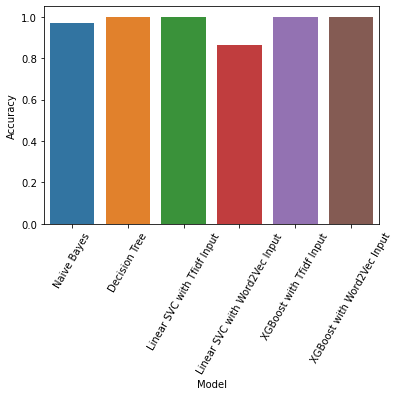

In [78]:
# Stored the model names and their accuracy in a dataframe
# Plotted a barplot for accuracy

classification_models = ['Naive Bayes', 'Decision Tree', 'Linear SVC with Tfidf Input', 'Linear SVC with Word2Vec Input', 'XGBoost with Tfidf Input', 'XGBoost with Word2Vec Input']
model_accuracy = []
for accuracy in (nb_accuracy, dt_accuracy_tfidf, svm_accuracy_tfidf, svm_accuracy_word2vec, xgb_accuracy_tfidf, xgb_accuracy_word2vec):
    model_accuracy.append(accuracy)

models_accuracy_df = pd.DataFrame({'Model': classification_models, 'Accuracy': model_accuracy})
bar = sb.barplot(x = 'Model', y = 'Accuracy', data = models_accuracy_df)
plt.xticks(rotation = 60)

In [79]:
# Created confusion matrices for the 3 models
nb_confusion_matrix = confusion_matrix(Y_test, Ypredict_nb)
dt_confusion_matrix = confusion_matrix(Y_test, Ypredict_tfidf_dt)
svm_tfidf_confusion_matrix = confusion_matrix(Y_test, Ypredict_tfidf_svm)
svm_word2vec_confusion_matrix = confusion_matrix(Y_test, Ypredict_word2vec_svm)
xgb_tfidf_confusion_matrix = confusion_matrix(Y_test, Ypredict_tfidf_xgb)
xgb_word2vec_confusion_matrix = confusion_matrix(Y_test, Ypredict_word2vec_xgb)



In [80]:
# Created dictionaries to store topics and topic ids

# Created a function to plot the confusion matrices of the 3 models
def plotConfusionMatrix(model_confusion_matrix, model_name, i):
    plt.subplot(i)
    sb.heatmap(model_confusion_matrix, annot = True, fmt = 'd', cmap = 'BuPu')
    plt.title('Confusion Matrix of the %s'%model_name)

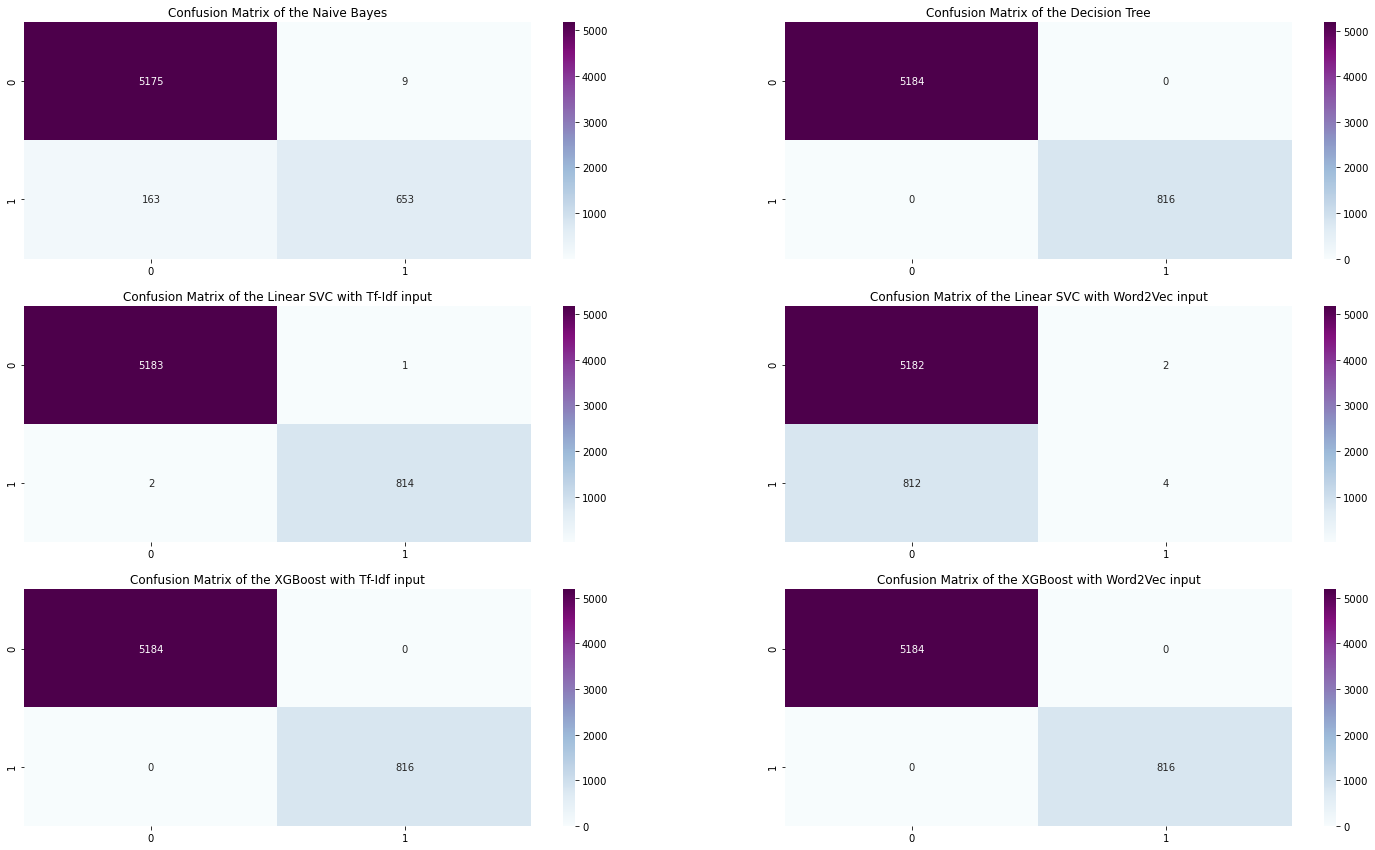

<Figure size 432x288 with 0 Axes>

In [81]:
# Plotted the heatmap of the 3 confusion matrices
plt.figure(figsize=(25, 20))
plotConfusionMatrix(nb_confusion_matrix, 'Naive Bayes', 421)
plotConfusionMatrix(dt_confusion_matrix, 'Decision Tree', 422)
plotConfusionMatrix(svm_tfidf_confusion_matrix, 'Linear SVC with Tf-Idf input', 423)
plotConfusionMatrix(svm_word2vec_confusion_matrix, 'Linear SVC with Word2Vec input', 424)
plotConfusionMatrix(xgb_tfidf_confusion_matrix, 'XGBoost with Tf-Idf input', 425)
plotConfusionMatrix(xgb_word2vec_confusion_matrix, 'XGBoost with Word2Vec input', 426)


plt.show()
plt.savefig('ConfusionMatrix.png')

In [82]:
print('Classification Report of Naive Bayes:')
print(classification_report(Y_test, Ypredict_nb))
print('*********************************************************************')
print('Classification Report of Decision Tree:')
print(classification_report(Y_test, Ypredict_tfidf_dt))
print('*********************************************************************')
print('Classification Report of Linear SVC with Tf-Idf input:')
print(classification_report(Y_test, Ypredict_tfidf_svm))
print('*********************************************************************')
print('Classification Report of Linear SVC with Word2Vec input:')
print(classification_report(Y_test, Ypredict_word2vec_svm))
print('*********************************************************************')
print('Classification Report of XGBoost with Tf-Idf input:')
print(classification_report(Y_test, Ypredict_tfidf_xgb))
print('*********************************************************************')
print('Classification Report of XGBoost with Word2Vec input:')
print(classification_report(Y_test, Ypredict_word2vec_xgb))
print('*********************************************************************')


Classification Report of Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5184
           1       0.99      0.80      0.88       816

    accuracy                           0.97      6000
   macro avg       0.98      0.90      0.93      6000
weighted avg       0.97      0.97      0.97      6000

*********************************************************************
Classification Report of Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5184
           1       1.00      1.00      1.00       816

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

*********************************************************************
Classification Report of Linear SVC with Tf-Idf input:
              precision    recall  f1-score   support

           0      

In [83]:
def predictTopic(text, model, isNeural):
    text = [text]
    #print(text)
    if isNeural == False:
        text_features = tfidf_vector.transform(text)
        prediction = model.predict(text_features)[0]
    else:
        text_features = text_tokenizer.texts_to_matrix(text)
        prediction = model.predict(text_features)
        prediction = np.argmax(prediction)
    return prediction


question = ["Do you know how much cholesterol is in the whey fuel (034574) has?"]

In [84]:
target_food_data['cleaned_tweet_text'] = target_food_data['text'].apply(lambda x : cleanTweetText(x))
target_food_data['churn_likeliness'] = target_food_data['cleaned_tweet_text'].apply(lambda x : predictTopic(x, dt_model, isNeural = False))

In [85]:
target_food_data.head()

,screen_name,date_time,location,text,cleaned_tweet_text,twitter_handles,twitter_hashtags,is_retweet,polarity,subjectivity,sentiment,food_platform,classifier_text,churn_likeliness
0,thechynarich,2021-11-02 23:29:05+00:00,"Under Your Skin, NY",@SheValidRite ðŸ˜‚ðŸ˜­ I be spending a mortgag...,shevalidrite spending mortgage ubereats grubhu...,@shevalidrite,NaN,False,0.00,0.0,Neutral,"ubereats, grubhub",ðÿ ðÿ i be spending a mortgage on ubereats and...,0
1,thedaphnemilan,2021-11-02 23:21:45+00:00,Los Angeles & San Diego,I downloaded grubhub &amp; uber eats and didnâ...,downloaded grubhub amp uber eats order anythin...,NaN,NaN,True,0.00,0.0,Neutral,"ubereats, grubhub",i downloaded grubhub uber eats and didnâ t ord...,0
2,BeachCFA,2021-11-02 22:58:01+00:00,"Virginia Beach, VA",Let comfort food come to you!\nðŸ˜ŠðŸ¥£\nPlace...,let comfort food come place delivery order chi...,NaN,NaN,True,0.00,0.0,Neutral,"doordash, grubhub",let comfort food come to you ðÿ šðÿ place your...,1
3,Swole_Dan,2021-11-02 21:35:15+00:00,The Bay,"@DoorDash_Help Itâ€™s ok, I just left it and g...",doordash help ok left got grubhub,"@doordash_help, @grubhub",NaN,False,0.00,0.0,Neutral,"doordash, grubhub",itâ s ok i just left it and got @grubhub,0
4,KabobiRaleigh,2021-11-02 21:00:22+00:00,"Crabtree Valley Mall, Raleigh","You can also place an order via DoorDash, Uber...",also place order via doordash ubereats grubhub...,NaN,NaN,True,-0.05,0.4,Negative,"ubereats, doordash, grubhub",you can also place an order via doordash ubere...,1


In [86]:
target_food_data.shape

(9332, 14)

In [87]:
target_food_data.to_csv(r'C:\Users\veera\Desktop\data\target_food_data.csv')

In [88]:
target_food_data.to_pickle('final_target_data.pkl')
#streaming_platforms_data.to_pickle('streaming_final_data.pkl')

In [89]:
target_food_data.shape

(9332, 14)